In [ ]:
import cv2
import cvzone
from cvzone.FaceMeshModule import FaceMeshDetector
camera = cv2.VideoCapture(0)

# CALCULATING FOCAL DISTANCE
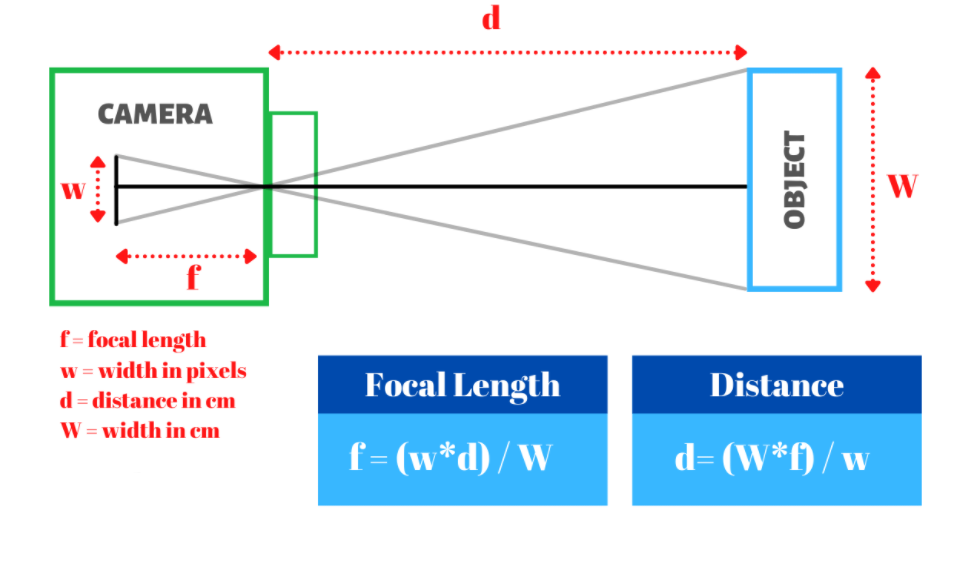

In [ ]:
# Finding Face
Face_Detector = FaceMeshDetector(maxFaces=1) # Setting hyperparameter as one, so it detect only one face
while True:
    success , image = camera.read()
    image , faces = Face_Detector.findFaceMesh(image)
    # If any face is available
    if faces:
        face = faces[0]
        LeftEYE = face[145] # landmark of left eye
        RightEYE = face[374] # landmark of right eye    
        cv2.circle(image, LeftEYE, 10, (255, 0, 255), cv2.FILLED) # visualizing left eye
        cv2.circle(image, RightEYE, 10, (255, 0, 255), cv2.FILLED) # visualizing right eye
        cv2.line(image, LeftEYE, RightEYE, (0, 200, 0), 3) # Drawing Line to check for distance between eye
        w, _ = Face_Detector.findDistance(LeftEYE, RightEYE) # storing distance between eye
        W = 6.3 # Average Pupillary Distance 
        # Finding the Focal Length
        d = 44
        f = (w*d)/W
        print(f)
    cv2.imshow("Calculate Distance", image)
    cv2.waitKey(1)

# CALCULATING DISTANCE 

In [ ]:
import cv2
import cvzone
from cvzone.FaceMeshModule import FaceMeshDetector
camera = cv2.VideoCapture(0)
Face_Detector = FaceMeshDetector(maxFaces=1) # Setting hyperparameter as one, so it detect only one face
while True:
    success , image = camera.read()
    image , faces = Face_Detector.findFaceMesh(image,draw=False)
    if faces:
        face = faces[0] 
        RightEYE = face[374] # landmark of Right eye  
        LeftEYE = face[145] # landmark of left eye
        w, _ = Face_Detector.findDistance(LeftEYE, RightEYE) # width between eyes in pixel that will change when distance from camera changes
        W = 6.3 # Average Pupillary Distance 
        f = 685.3346979937062 # Calculated Focal Length
        d = (W * f) / w # distance between camera and eyes
        cvzone.putTextRect(image, f'DISTANCE: {int(d)}cm',(face[10][0] - 100, face[10][1] - 50),scale=2)
    cv2.imshow("Calculate Distance", image)
    cv2.waitKey(1)